## Naive Bayes Classification using Scikit-learn

#### Loading Data

In [2]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
wine = datasets.load_wine()

#### Exploring Data

In [3]:
# print the names of the 13 features
print("Features: ", wine.feature_names)

# print the label type of wine(class_0, class_1, class_2)
print("Labels: ", wine.target_names)

Features:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Labels:  ['class_0' 'class_1' 'class_2']


In [4]:
# print data(feature)shape
wine.data.shape

(178, 13)

In [5]:
# print the wine data features (top 5 records)
print(wine.data[0:5])

[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]


In [6]:
# print the wine labels (0:Class_0, 1:class_2, 2:class_2)
print(wine.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


#### Splitting Data

In [17]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3,random_state=11)

In [10]:
X_train.shape

(124, 13)

#### Model Generation

In [11]:
X_test.shape

(54, 13)

In [12]:
y_train.shape

(124,)

In [14]:
y_test.shape

(54,)

In [18]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

#### Evaluating Model

In [19]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("(Naive Bayes) Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9444444444444444


In [20]:
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      0.86      0.93        22
           2       0.85      1.00      0.92        11

    accuracy                           0.94        54
   macro avg       0.93      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54

[[21  0  0]
 [ 1 19  2]
 [ 0  0 11]]


In [35]:
# Training sizes of (10%, 20%, 30%, 40%, 50%) with confusion matrix and accuracy
gnb = GaussianNB()
training_size = [0.1,0.2,0.3,0.4,0.5]
accuracy = []
for n in training_size:
    X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=n,random_state=11)
    gnb.fit(X_train, y_train)
    y_pred = gnb.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test, y_pred))
    print("Training size - ",n*100,"%: ")
    print("Classification accuracy: ",metrics.accuracy_score(y_test, y_pred))
    print("Confusion Matrix:")
    print(metrics.confusion_matrix(y_test, y_pred))
    print(metrics.classification_report(y_test, y_pred),'\n')
print(accuracy)

Training size -  10.0 %: 
Classification accuracy:  1.0
Confusion Matrix:
[[8 0 0]
 [0 7 0]
 [0 0 3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         3

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18
 

Training size -  20.0 %: 
Classification accuracy:  1.0
Confusion Matrix:
[[14  0  0]
 [ 0 15  0]
 [ 0  0  7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00         7

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36
 

Training size -  30.0

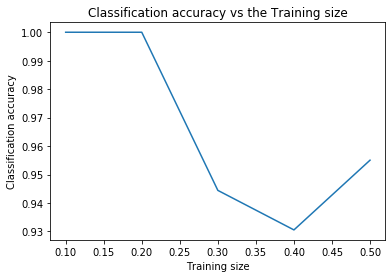

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.title("Classification accuracy vs the Training size")
plt.xlabel("Training size")
plt.ylabel("Classification accuracy")
plt.plot(training_size, accuracy)

#### LDA

In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, y_train)
y_pred_lda = LDA.predict(X_test)

In [23]:
print("(LDA) Accuracy:", metrics.accuracy_score(y_test, y_pred_lda))
print(metrics.classification_report(y_test, y_pred_lda))
print(metrics.confusion_matrix(y_test, y_pred_lda))

(LDA) Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00        11

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54

[[21  0  0]
 [ 0 22  0]
 [ 0  0 11]]


#### PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train).transform(X_train)
y_pred_pca = pca